In [22]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from matplotlib.lines import Line2D

def compute_srocc(x, y):
    corr, p = stats.spearmanr(x, y)
    return corr

# Enter you Data Path here

In [7]:
#### ENTER YOUR DATA PATH ####

top_dir = ''

####

metrics_path = os.path.join(top_dir, 'metrics.csv')
reader_scores_path = os.path.join(top_dir, 'ReaderScores.csv')

# Load Metric Results

In [8]:
metrics_df = pd.read_csv(metrics_path)
metrics_df.head()

,Acceleration,Method,ScanID,SSFD,LPIPS,RINFD,SSIM,PSNR
0,2.0,UNet,1000017,243.192413,2.126998,0.000129,0.812590,31.923672
1,2.0,UNet,1000026,237.177658,2.145622,0.000128,0.792901,31.237972
2,2.0,UNet,1000041,139.226044,1.916435,0.000122,0.893749,32.659756
3,2.0,UNet,1000071,216.793777,2.114370,0.000147,0.897639,34.474800
4,2.0,UNet,1000107,101.807350,1.999220,0.000124,0.887864,32.893375


# Load Reader Scores

In [9]:
rs_df = pd.read_csv(reader_scores_path)

mean_values = rs_df.groupby(['Acceleration', 'Method', 'ScanID'])[['Aliasing', 'Cartilage/Meniscus']].mean()
mean_rs_df = rs_df.drop(['Aliasing', 'Cartilage/Meniscus'], axis=1).merge(mean_values, on=['Acceleration', 'Method', 'ScanID'])

df = metrics_df.merge(mean_rs_df, how = 'outer', on = ['ScanID', 'Method', 'Acceleration'])
df = df.dropna(axis=0)
df.head()

,Acceleration,Method,ScanID,SSFD,LPIPS,RINFD,SSIM,PSNR,Reader,Aliasing,Cartilage/Meniscus
0,2.0,UNet,1000017,243.192413,2.126998,0.000129,0.81259,31.923672,A,6.6,6.8
1,2.0,UNet,1000017,243.192413,2.126998,0.000129,0.81259,31.923672,B,6.6,6.8
2,2.0,UNet,1000017,243.192413,2.126998,0.000129,0.81259,31.923672,C,6.6,6.8
3,2.0,UNet,1000017,243.192413,2.126998,0.000129,0.81259,31.923672,D,6.6,6.8
4,2.0,UNet,1000017,243.192413,2.126998,0.000129,0.81259,31.923672,E,6.6,6.8


# Metric Correlation Plots

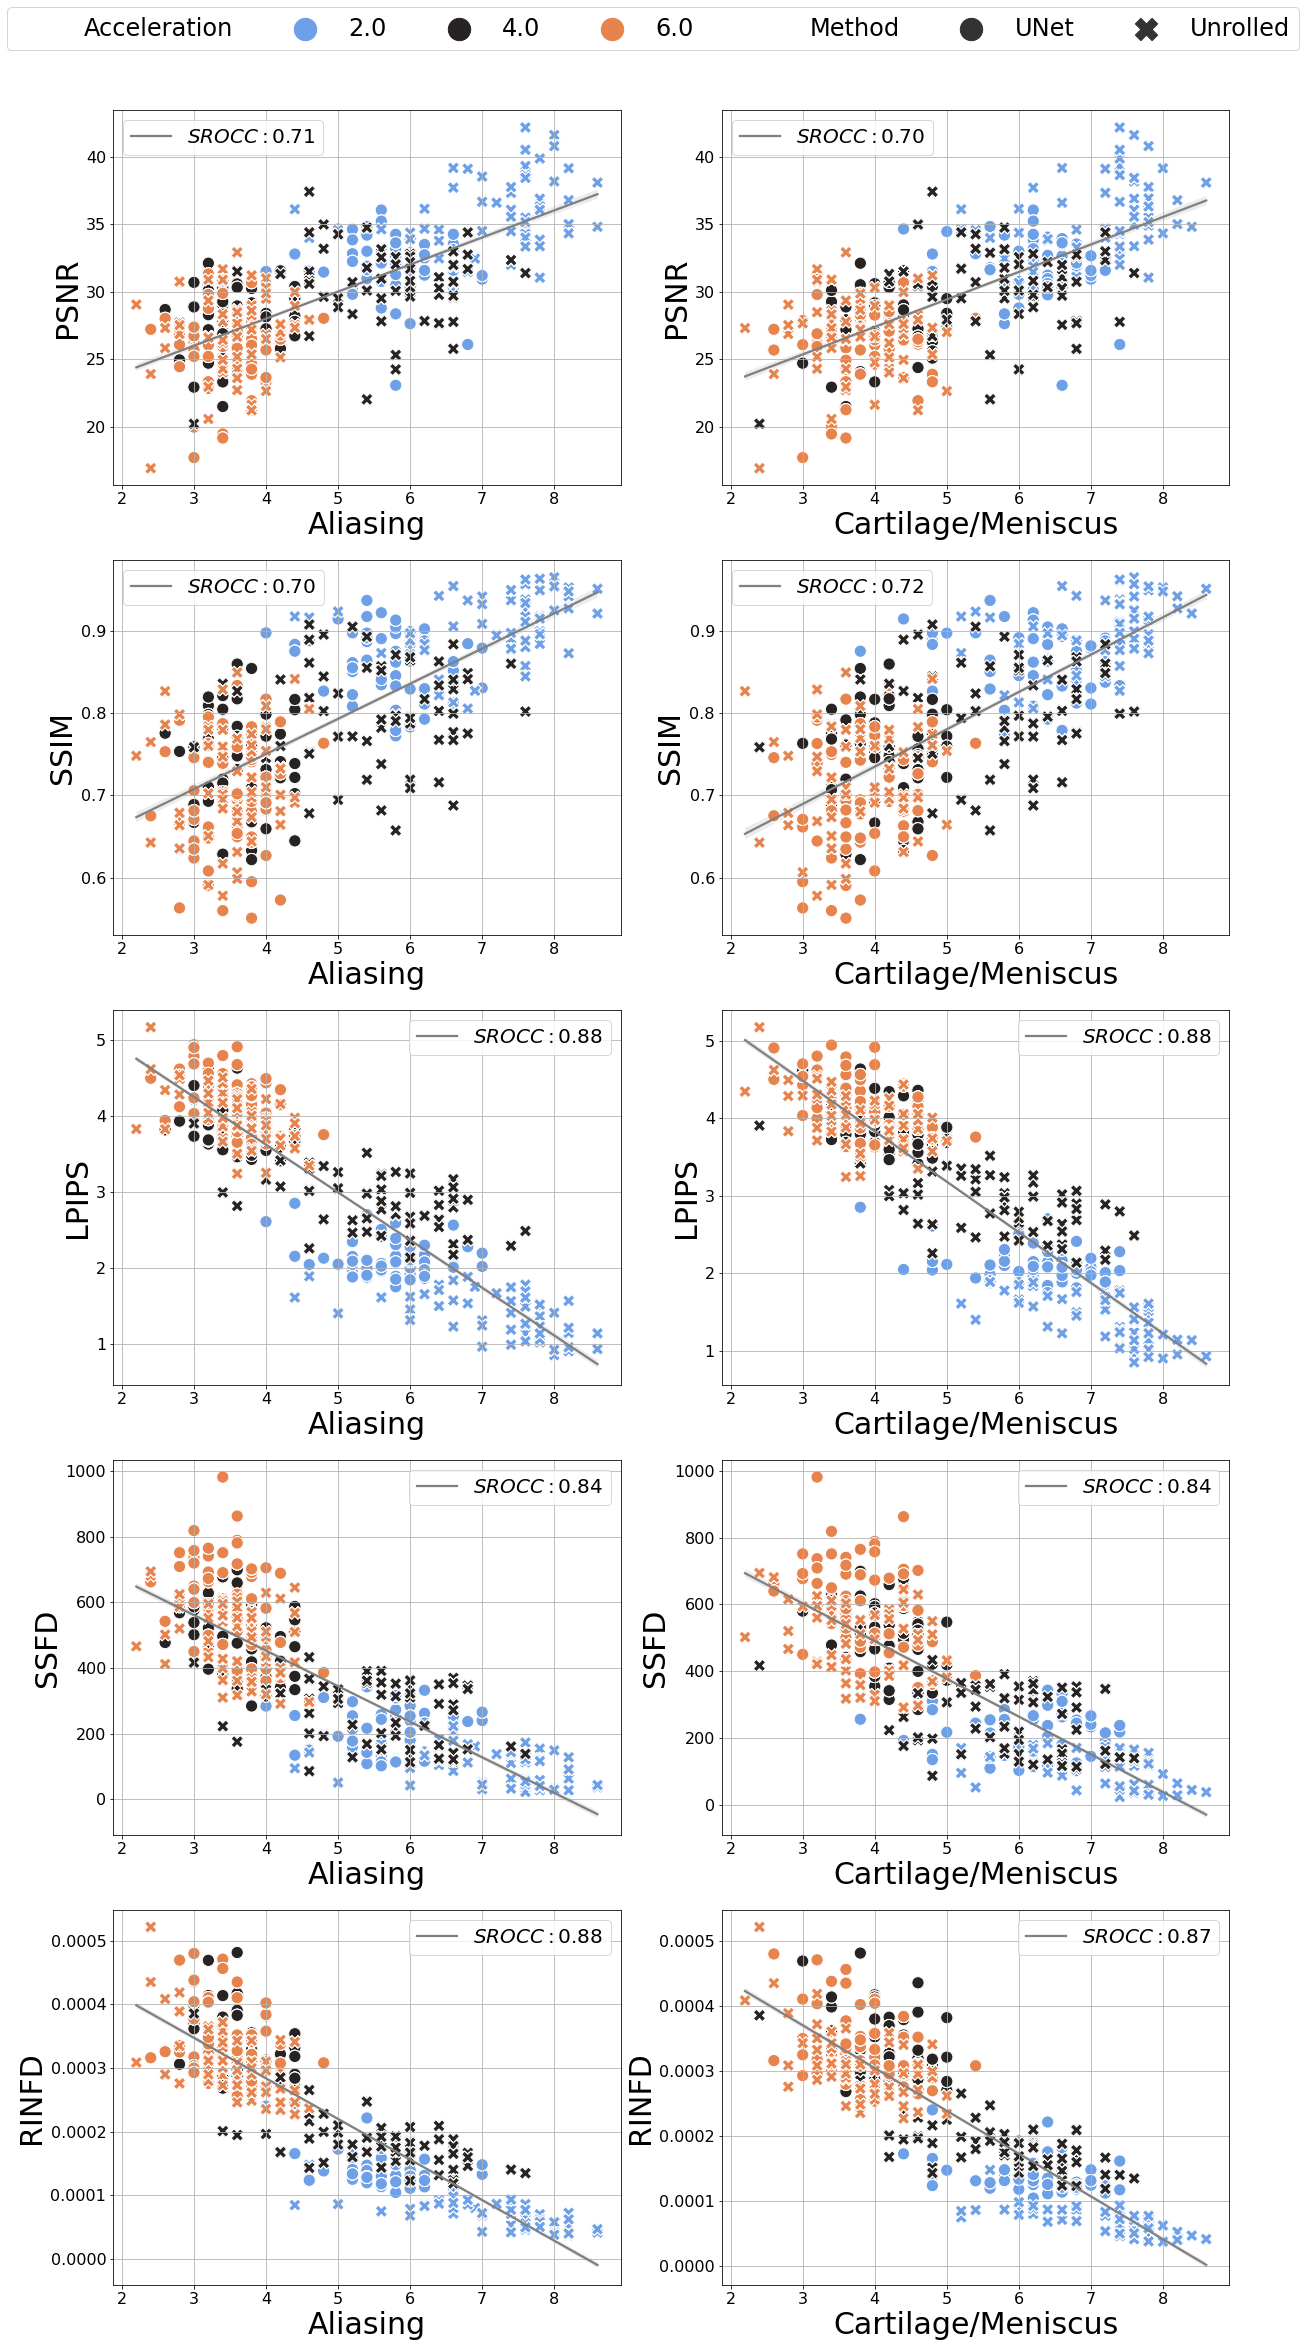

In [27]:
### ENTER METRICS HERE ####

metrics = ['PSNR', 'SSIM', 'LPIPS', 'SSFD', 'RINFD']

####

scores = ["Aliasing","Cartilage/Meniscus"]

fig, axes = plt.subplots(len(metrics), 2, figsize=(20,len(metrics)*8))
axes = axes.ravel()
palette =sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

i = 0

for metric in metrics:
    for score in scores:
        srocc = compute_srocc(df[score], df[metric])
        sns.regplot(data=df, x=score, y=metric, scatter=False, color = 'grey', ci = 95, ax=axes[i])
        scatter = sns.scatterplot(x=score, y=metric, data = df, s= 150, ax=axes[i], hue = 'Acceleration', style = 'Method', palette = palette);
        axes[i].set_ylabel(metric, fontsize=30);
        axes[i].set_xlabel(score, fontsize=30);
        axes[i].legend([r'$SROCC:{0:.2f}$'.format(np.abs(srocc))], fontsize=20)

        axes[i].grid()
        i += 1
    
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 


handles, labels = scatter.get_legend_handles_labels()
legend = fig.legend(handles, labels, title="", loc="upper center",bbox_to_anchor=(0.5, 0.92),ncol=7,fontsize=24)


for handle in legend.legendHandles:
    handle.set_sizes([500])  